In [1]:
import os

os.environ["HOST_URL"] = "http://51.91.251.0:3000"
os.environ["USER_ID"] = "f89fec0b-183b-4921-bf15-197101c14192"
os.environ["SQL_USERNAME"] = "postgres"
os.environ["SQL_PASSWORD"] = "^de<@TETh~}*;:/*"
os.environ["SQL_HOST"] = "34.155.175.170"
os.environ["SQL_PORT"] = "5432"
os.environ["SQL_SCRAPE_DATABASE"] = "scrape"

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pdpbox import pdp
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import pickle

from defi_ai import (
    Avatar,
    Hotel,
    Request,
    Response,
    City,
    Language,
    Sample,
    init_session,
)

Session = init_session()
session = Session()

In [3]:
# Data Loader
df = Request.load_dataset(session, False)
sample = Sample.load_dataset(session)

feature_names = sample.columns

In [4]:
# Test_set split 0.5%
from sklearn.model_selection import train_test_split
_,X_test,_,Y_test = train_test_split(df.drop(['price'],axis=1),df['price'] , test_size=0.005, random_state=42)
X_test = X_test.astype(int)

# Permutation

In this party, we study about the importance score of each features included in the the trained models.

In [5]:
feature_names= X_test.columns.tolist()
features_importance_dict = {}

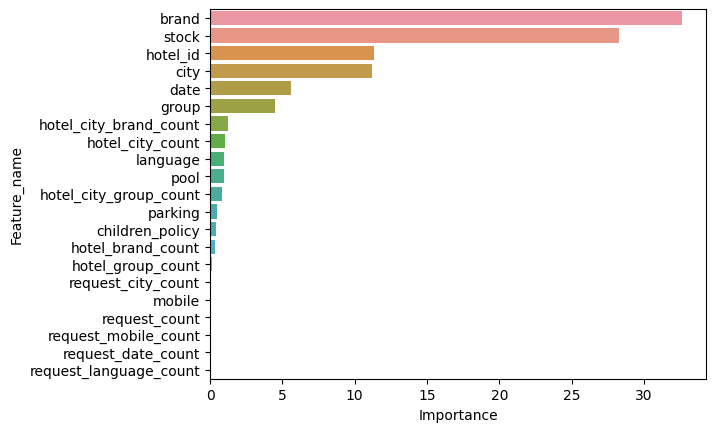

In [6]:
cat = CatBoostRegressor()
cat.load_model('model/price_catboost.cbm')

features_importance = cat.get_feature_importance(prettified=True)

features_importance = features_importance.rename(columns={'Feature Id':'Feature_name',"Importances":"Importance"})
features_importance_dict['cat'] = features_importance
ax = sns.barplot(x="Importance", y="Feature_name", data=features_importance)

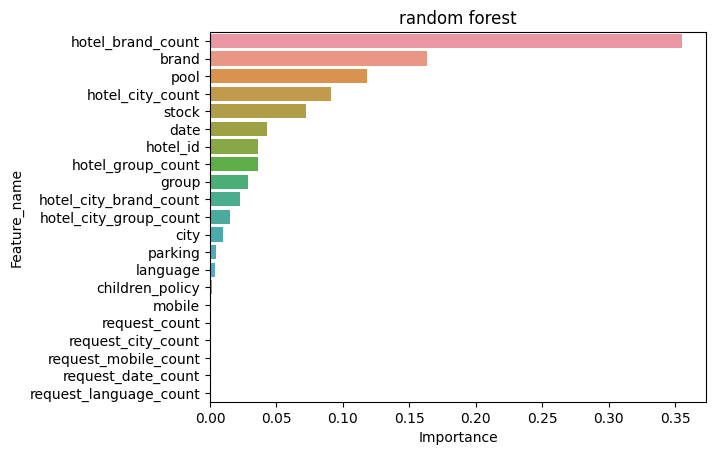

In [7]:
filename = 'model/rf.sav'
rf = pickle.load(open(filename, 'rb'))

model = rf
model_name = 'random forest'

features_importance = {'Feature_name':feature_names, 'Importance':model.feature_importances_} 
features_importance = pd.DataFrame(features_importance) 
features_importance = features_importance.sort_values(['Importance'], ascending=False) 
features_importance_dict[model_name] = features_importance

sns.barplot(x="Importance", y="Feature_name", data=features_importance)
plt.title(model_name)
plt.show()

Text(0.5, 1.0, 'XGB')

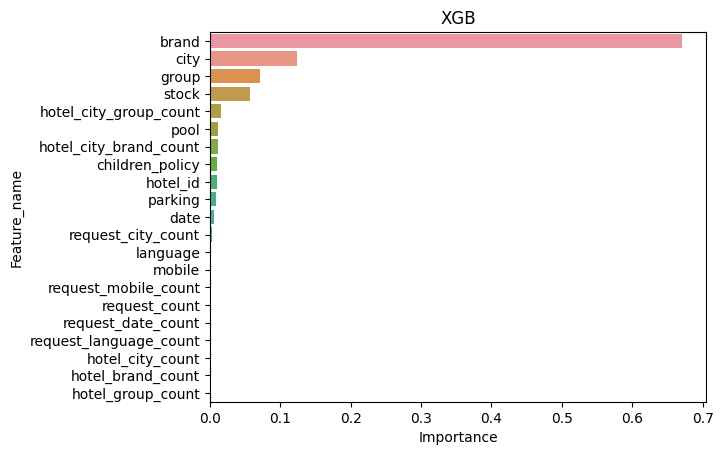

In [9]:
xgb = XGBRegressor()
xgb.load_model("model/xgb.ubj")

model = xgb
model_name = 'XGB'

features_importance = {'Feature_name':feature_names, 'Importance':model.feature_importances_} 
features_importance = pd.DataFrame(features_importance) 
features_importance = features_importance.sort_values(['Importance'], ascending=False) 
features_importance_dict[model_name] = features_importance

sns.barplot(x="Importance", y="Feature_name", data=features_importance)
plt.title(model_name)

This method is a global interpretation method that consist of creating a dataset with the instants permuted. It can be easily spotted that each feature has different importance score for different model. Another remark is that most of the features that have high impact (high score of importance) are the one has high score in the correlation matrix created in the $Analyse$ notebook.

# PDP and ICE plots

In this part, we study about the impact of each feature that has **high importance score** in last session on the **test set** by creating **Partial Dependent Plot$** concerning two models: $RandomForest$ and $XGBoost$.

### Random Forest model

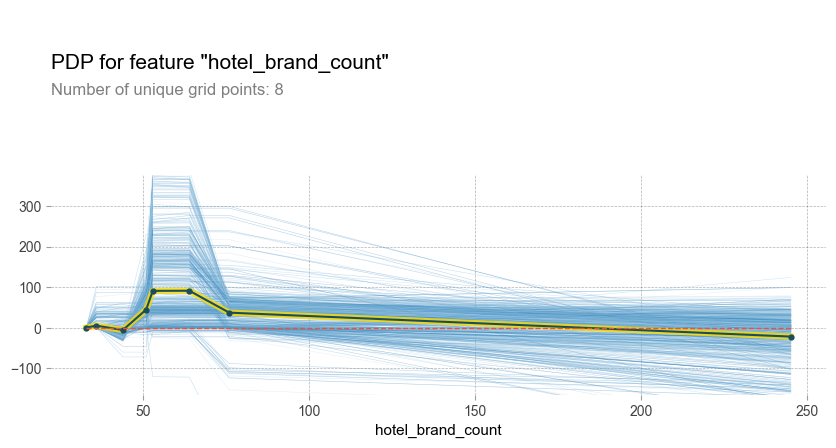

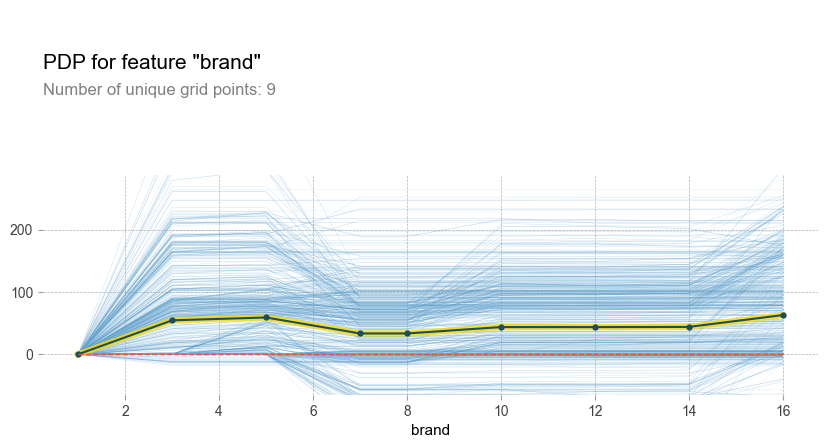

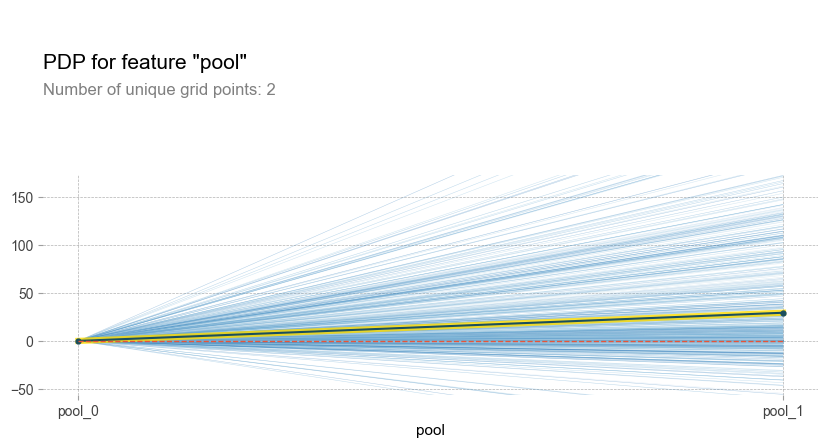

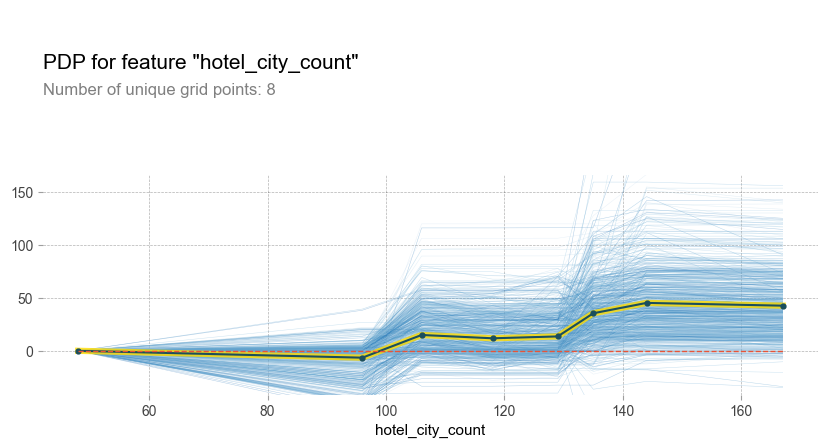

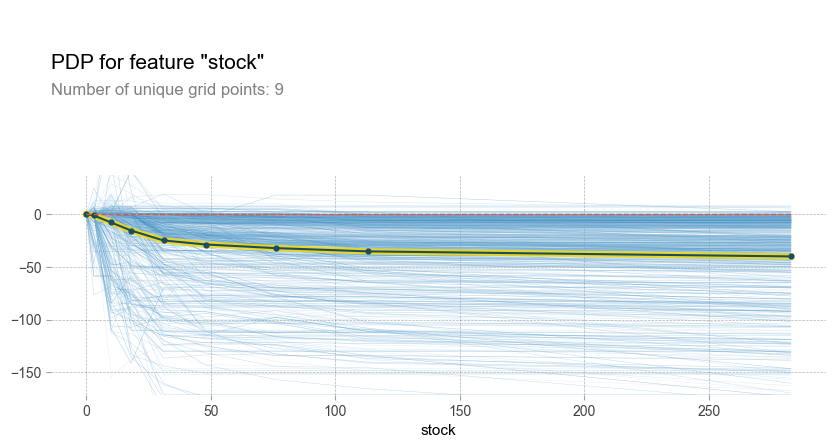

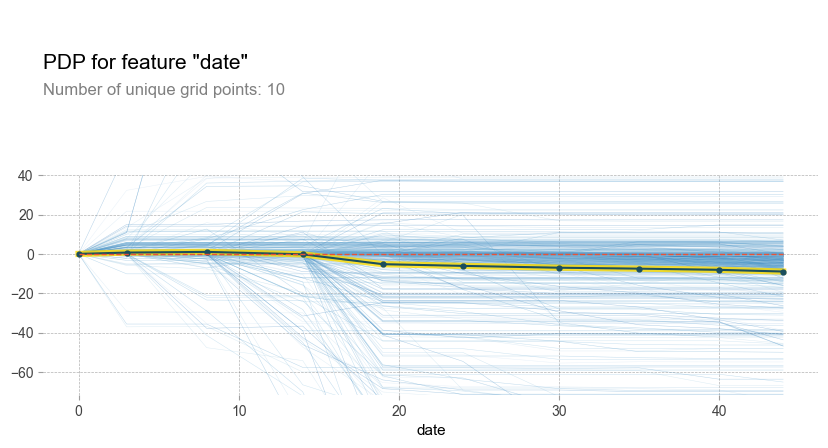

In [10]:
model = rf
model_name = 'random forest'

top_features = features_importance_dict[model_name].Feature_name[:6].values
for i, feature in enumerate(top_features, 1):
  pdp_feat = pdp.pdp_isolate(model=model, dataset=X_test, model_features=feature_names, feature=feature)
  pdp.pdp_plot(pdp_feat, feature, plot_lines=True, frac_to_plot=0.1, figsize=(10,5))
  plt.show()

### XGBoost model

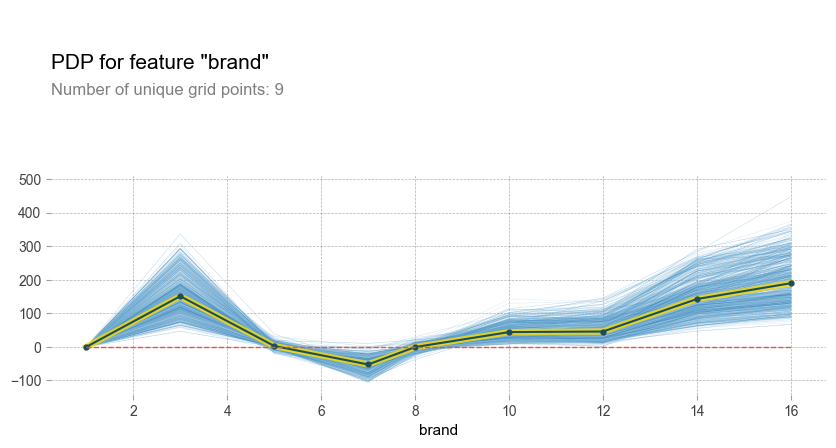

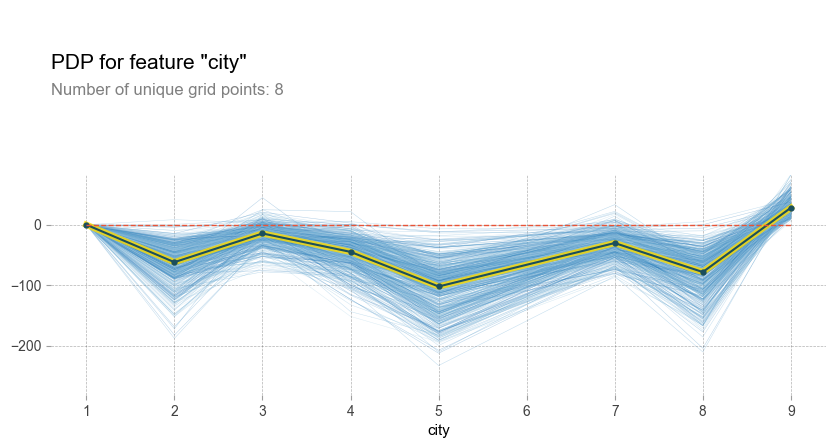

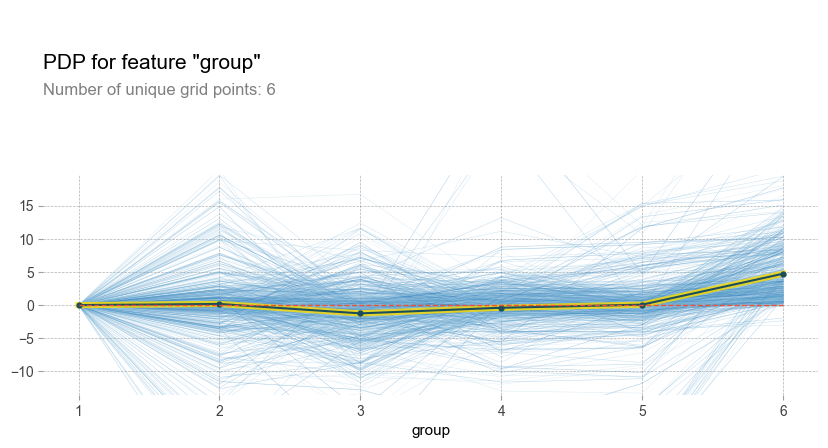

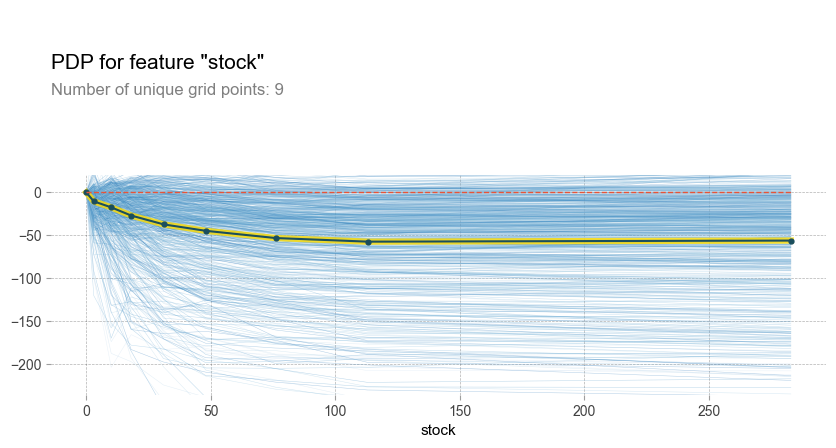

In [11]:
model = xgb
model_name = 'XGB'

top_features = features_importance_dict[model_name].Feature_name[:4].values
for i, feature in enumerate(top_features, 1):
  pdp_feat = pdp.pdp_isolate(model=model, dataset=X_test, model_features=feature_names, feature=feature)
  pdp.pdp_plot(pdp_feat, feature, plot_lines=True, frac_to_plot=0.1, figsize=(10,5))
  plt.show()

**Interpretation**
- The plots above allow us to understand better the tendencies of their model and exposure inconsistencies and irregular model behaviour.
- A stiff and thin line of ICE means a strong impact of the features.
- A diverse and noisy line indicates a weak impact.
- As we can all state, the PDP and ICE well correspond to the ranking of the feature's importance.

# PDP Interaction between 2 features
This party is to study about the relation of each couple features to compare with correlation score in the notebook $Analyse$.

### For XGBoost model

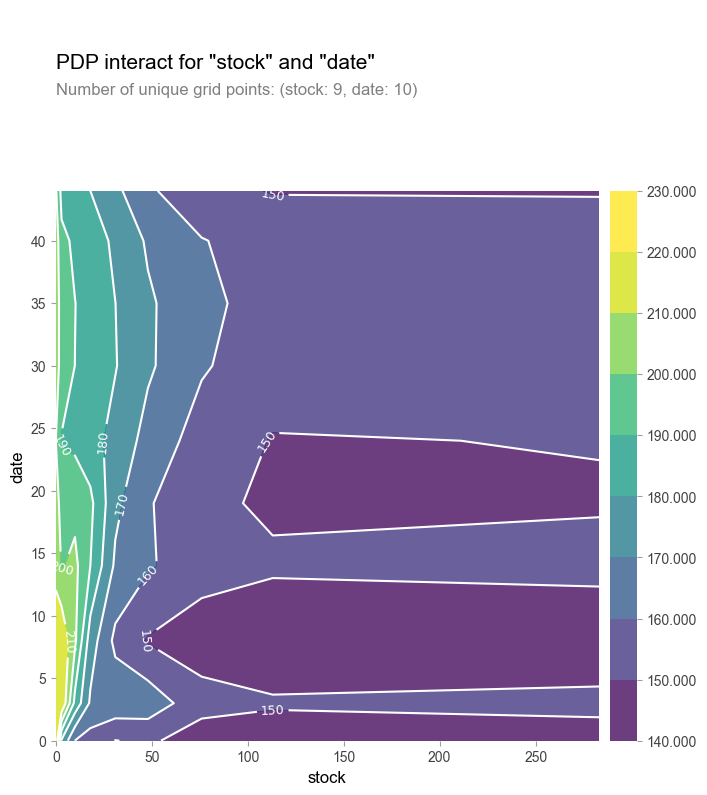

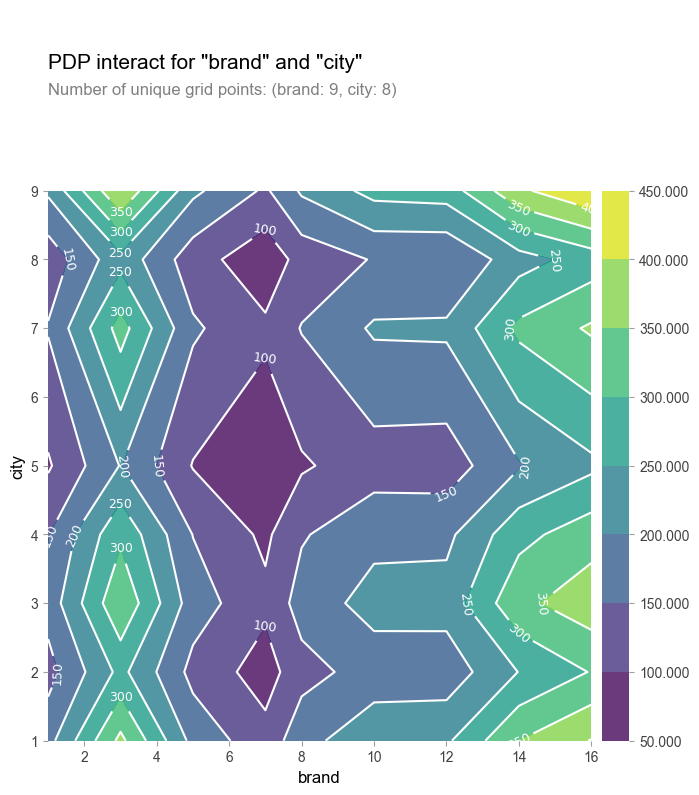

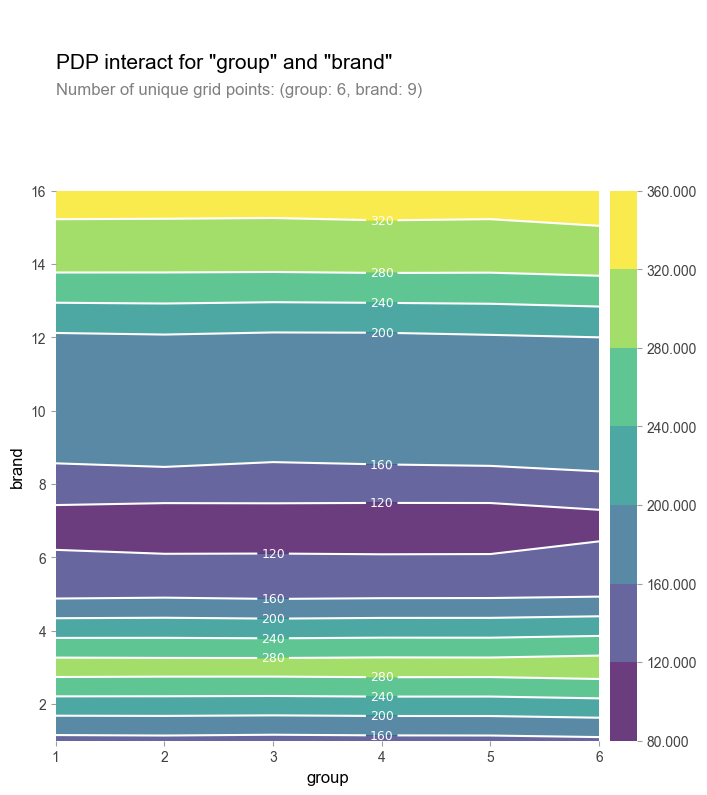

In [12]:
model = xgb

features_to_plot = ['stock', 'date']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

features_to_plot = ['brand', 'city']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

features_to_plot = ['group', 'brand']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

### For Random Forest model

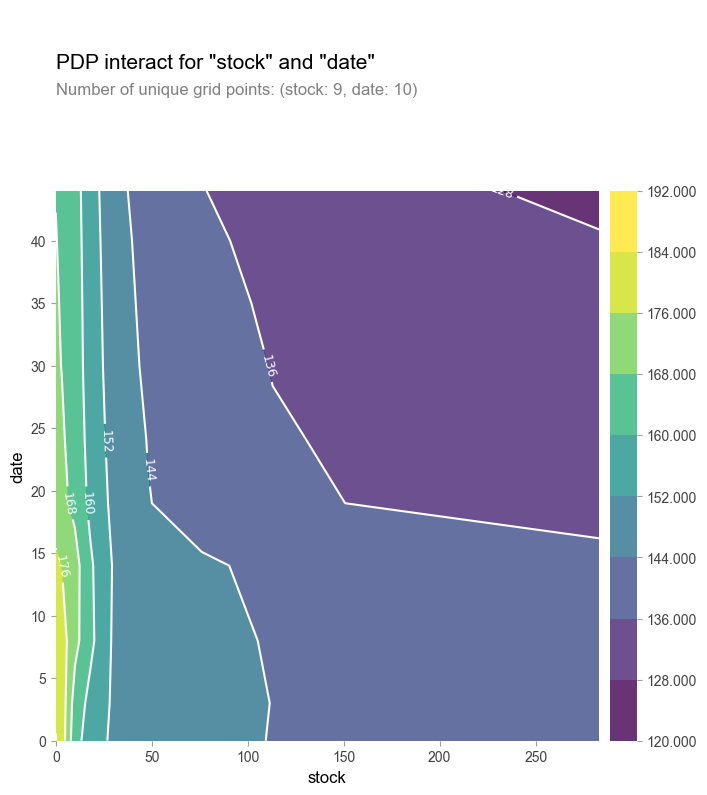

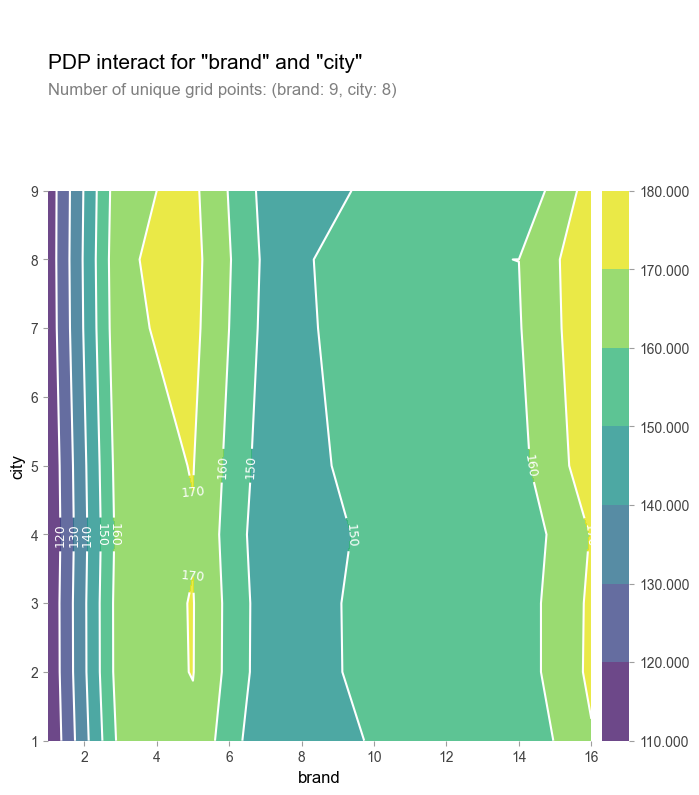

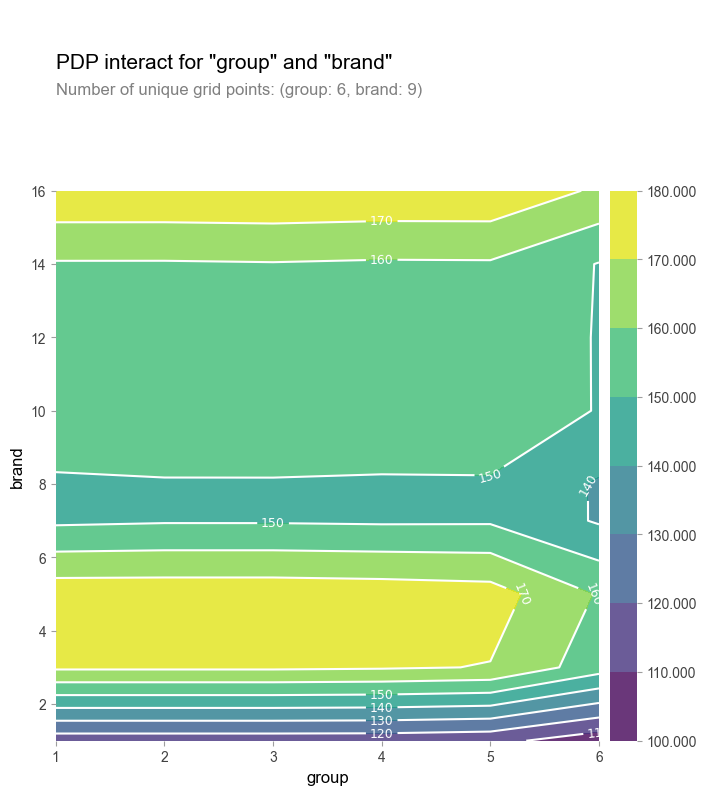

In [13]:
model = rf

features_to_plot = ['stock', 'date']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

features_to_plot = ['brand', 'city']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

features_to_plot = ['group', 'brand']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

**Interpretation**

The plot show significant interest in the relation of these couples of feature. The result also corresponds well to the correlation score. However, the relation between $'city'$ and $'brand'$ of the two models are different.

# LIME

$Lime$ is a method concerning the local agnostic. This method is to have a better view on how the change of parameters affects the predicted result of each model.

### Random Forest

In [14]:
import lime
import lime.lime_tabular
model = rf
index = 5

explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, feature_names=feature_names, mode="regression")
exp = explainer.explain_instance(X_test.iloc[index], model.predict, num_features=4, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)

### XGBoost

In [15]:
import lime
import lime.lime_tabular
model = xgb
index = 0

explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, feature_names=feature_names, mode="regression")
exp = explainer.explain_instance(X_test.iloc[index], model.predict, num_features=4, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)